In [1]:
#Imports
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import pandas as pd
import numpy as np
import cv2
import gc

import matplotlib.pyplot as plt

print(tensorflow.__version__)

2.4.1


Found 62400 images belonging to 26 classes.
Found 11700 images belonging to 26 classes.


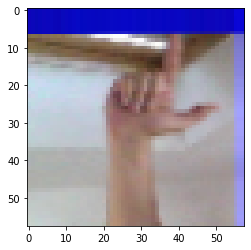

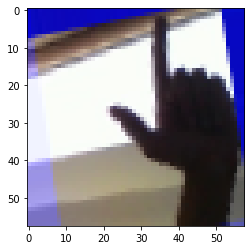

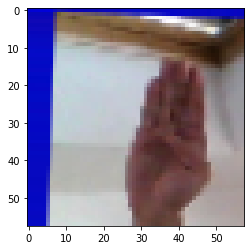

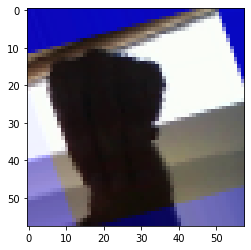

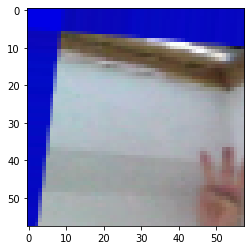

In [2]:
base_dir = '../data/alphabets'

img_size = 58

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range = 20,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

x,y = train_generator.next()
for i in range(5,10):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [3]:
model = Sequential()
model.add(Conv2D(64, (2,2), input_shape=(img_size,img_size,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (2,2), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(26, activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 57, 57, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         3

In [4]:
history = model.fit(
train_generator,
epochs = 30,
validation_data = validation_generator)

Epoch 1/30
3120/3120 [==============================] - 100s 31ms/step - loss: 2.8148 - accuracy: 0.1525 - val_loss: 1.3938 - val_accuracy: 0.5902
Epoch 2/30
3120/3120 [==============================] - 76s 24ms/step - loss: 1.2559 - accuracy: 0.5798 - val_loss: 1.0452 - val_accuracy: 0.7124
Epoch 3/30
3120/3120 [==============================] - 77s 25ms/step - loss: 0.8701 - accuracy: 0.7035 - val_loss: 1.1357 - val_accuracy: 0.7291
Epoch 4/30
3120/3120 [==============================] - 75s 24ms/step - loss: 0.6798 - accuracy: 0.7626 - val_loss: 1.5572 - val_accuracy: 0.7061
Epoch 5/30
3120/3120 [==============================] - 76s 24ms/step - loss: 0.5759 - accuracy: 0.7994 - val_loss: 1.0741 - val_accuracy: 0.7556
Epoch 6/30
3120/3120 [==============================] - 76s 24ms/step - loss: 0.5235 - accuracy: 0.8212 - val_loss: 1.0528 - val_accuracy: 0.7797
Epoch 7/30
3120/3120 [==============================] - 78s 25ms/step - loss: 0.4666 - accuracy: 0.8378 - val_loss: 0.8898 

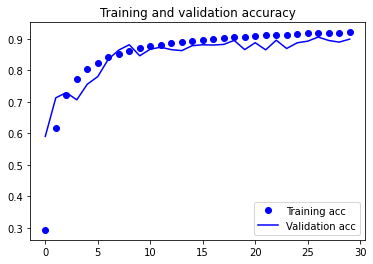

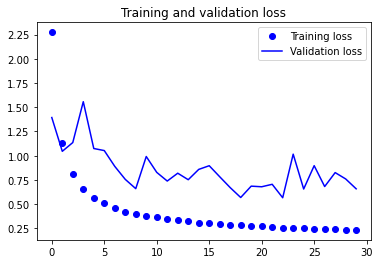

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print(test_acc)

Found 3900 images belonging to 26 classes.


C:\Users\mrzeo\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.9340000152587891


In [8]:
model.save('Alphabets Model ' + str(round(test_acc*100, 2)) + '%.h5')

In [9]:
img_size = 58
def prediction(model, array, items_l):
    prob = model.predict(array.reshape(1, img_size, img_size,3 ))
    pro_df = pd.DataFrame(prob, columns = items_l)
    print(prob[0][np.argmax(prob)])
    if prob[0][np.argmax(prob)] > 0.9:
        result = items_l[np.argmax(prob)]
    else:
        result = ''
    return pro_df, result

from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255.0
    return image_array


In [11]:
img = image_process('4.jpg')
model = tensorflow.keras.models.load_model('Alphabets Model 93.4%.h5')
pro_df, result = prediction(model, img, os.listdir('../data/alphabets/train'))
print(pro_df)
print(result)

1.0
              A    B             C             D             E             F  \
0  8.527539e-19  1.0  3.962908e-11  3.019986e-21  1.048124e-13  3.081307e-09   

              G             H             I             J  ...             Q  \
0  2.522585e-10  1.132498e-12  7.889572e-12  8.101655e-10  ...  1.876311e-28   

              R             S             T             U             V  \
0  2.892606e-20  2.543905e-23  1.562099e-13  1.110907e-12  3.280664e-22   

              W             X             Y             Z  
0  3.372176e-20  3.180590e-22  7.820776e-26  1.197573e-16  

[1 rows x 26 columns]
B
